# Case Study - Spam Detection

The main aim of this project is to demonstrate the basics of Natural Language Processing (NLP) for a Text classifacation problem

We will follow

1. Load the Data
2. Exploratory Data Analysis
3. Segregate the Inputs and outputs
4. split the data into training and Testing Data
5. Data Transformation -
6. Model building - Build the Model on Processed Train Data
7. Data Preparation - aPply data Preparation on the Testing Data
8. Prediction on Test Data - Use the Trained model to predict on test Data
9. Evaluation-  caculate the score of model by matching model's prediction with actual value


### Major Steps involved

1. Text Data Visualization
2. Text Data Preprocessing
3. Text Data Vectorization - Text To Numerical Representation using Bag of Words



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 - Load the Data

In [2]:
df = pd.read_csv("C:/Users/Admin/OneDrive - ptit.edu.vn/Desktop/email_data.csv")

df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


# Step 2 - Exploratory Data Analysis


In [3]:
df.shape


(5171, 4)

## 2.a. Explore the Data Distribution of Target Variable



In [4]:
df['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [5]:
df['label'].value_counts(normalize = True)

label
ham     0.710114
spam    0.289886
Name: proportion, dtype: float64

In [6]:
print(3672 / (3672 + 1499))

0.7101140978534133


<Axes: title={'center': 'Class Distribution'}, xlabel='label', ylabel='count'>

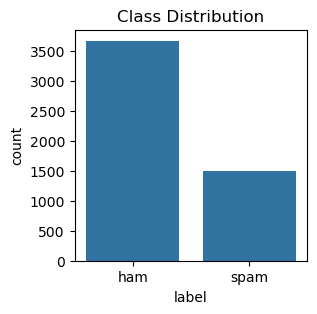

In [8]:
fig, ax = plt.subplots(figsize = (3, 3))

ax.set_title("Class Distribution")

sns.countplot(data = df, x = 'label')

## 2.b. Visualizing the Distribution of most frequent Words

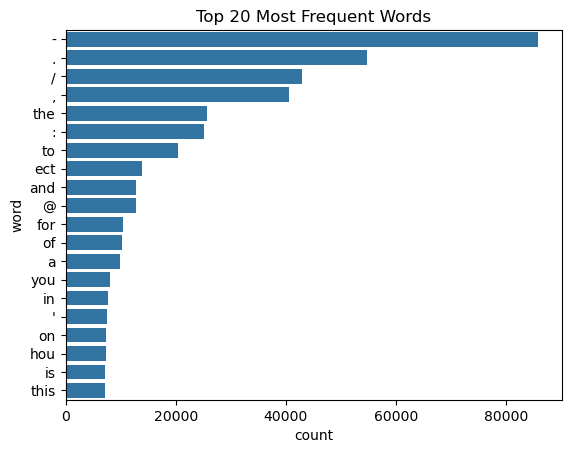

In [13]:
from collections import Counter

# get all words in the text

all_words =  " ".join(df['text'].values).split()
# all_words là các từ được tách ra trong 'text'

word_counts = Counter(all_words)
# đếm các từ xuất hiện bao nhiêu lần
# get the most common words
common_words = word_counts.most_common(20)

# lấy 20 từ phổ biến nhtaas, xuất hiện nhiều nhất trong top 20

# tạo DataFrame cho common_words
common_words_df = pd.DataFrame(common_words, columns = ['word', 'count'])

#plot the most common words

sns.barplot(data = common_words_df, x = 'count', y = 'word')
plt.title("Top 20 Most Frequent Words")
plt.show()


## 2.c. Classwise World Cloud - Explore the Relationships between each pair of Inputs and Output
mục đích dừng worldCloud

1. Khám phá dữ liệu văn bản
2. - Chp biết từ nào xuất hiện nhiều nhất trong tập văn bản
3. So sánh giữa các nhóm ( Classwise WorldCloud)
4. - ví dụ trong phân loajin spam, ham ví dụ spam thường có các từ 'free', 'win', 'offer'
   - Ham  thường có các từ 'meeting', 'project', 'hello'
5. 3 trực quan hóa để thuyế trình báo cáo

In [16]:

! pip install wordcloud

In [18]:
from wordcloud import WordCloud

# import wordCloud


In [19]:
# WordCloud for spam messages
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [23]:

# World Cloud for spam messages
spam_text = " ".join(df[df['label'] == 'spam']['text'].values)
spam_wordcloud = WordCloud(width=800, height = 400, background_color = 'white').generate(spam_text)

In [24]:

# World Cloud for ham messages
ham_text = " ".join(df[df['label'] == 'ham']['text'].values)
ham_wordcloud = WordCloud(width=800, height = 400, background_color = 'white').generate(ham_text)

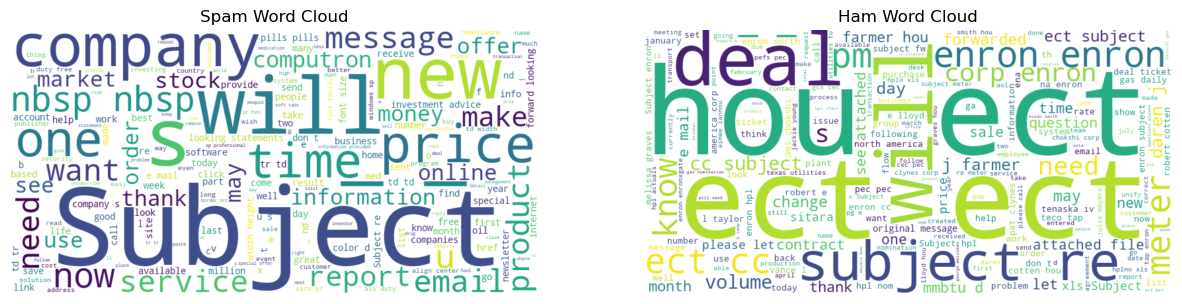

In [25]:
# display the word cloud
fig, ax = plt.subplots(1, 2, figsize = (15, 7))

ax[0].imshow(spam_wordcloud, interpolation = "bilinear")
ax[0].axis('off')
ax[0].set_title("Spam Word Cloud")

ax[1].imshow(ham_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Ham Word Cloud')
plt.show()

### Observations
1. There is a clear need to preprocessing the text Data as most of most frequent tokens are special Characters and punctuations
2. There are words like 'Subject', 'ect', 'hou', ... which looks dominating

# Data Preparation amd Model Buiding Pipeline
1. Segregate the Inputs (X) and Output (y)
2. Split into train and test (X_train, X_test, y_train, y_test)
3. Data Preparation: Data Cleaning and Feature Engineering.
4. Clean the training data
5. Preprocess the training data (X_train_transformed)
6. Training Phase: Build a model
7. Preprocess the test data (X_test_transformed)
8. Predict on unseen data
9. Evaluate the model performance

# Step 3 - Segregate Inputs(X) and Output(y)

In [26]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [27]:
y = df['label']

X = df[["text"]]

# Step 4 - Split the data into Train and Test


In [55]:
# splitting into train and Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(y_train, y_test)

(4136, 1) (4136,)
(1035, 1) (1035,)
5132     ham
2067    spam
4716     ham
4710     ham
2268    spam
        ... 
4426     ham
466      ham
3092    spam
3772     ham
860      ham
Name: label, Length: 4136, dtype: object 1566     ham
1988    spam
1235     ham
2868     ham
4903     ham
        ... 
1175    spam
4476     ham
4198    spam
2689     ham
2142     ham
Name: label, Length: 1035, dtype: object


# Step 5 - Apply Data Preparation on Trainning data


In [42]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean(doc):
    # doc is a string of text
    # let's define a regex to match special characters and digits

    regex = "[^a-zA-z.]"
    doc = re.sub(regex, " ", doc)

    # convert to lowercase
    doc = doc.lower()
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # stop word.remova
    stop_words = list(set(stopwords.words("english")))
    custom_stop_words = ['subject','ect', 'hou', 'message', 'enron', 'nbsb']
    stop_words = stop_words + custom_stop_words

    filtered_tokens = [word for word in tokens if word not in stop_words]

    # lemmatize
    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # join and return 
    return " ".join(lemmatized_tokens)

In [43]:
# tokenization
def tokenizer(doc):
    return nltk.word_tokenize(doc)

In [44]:

# import feature extraction methods from sklearn

from sklearn.feature_extraction.text import CountVectorizer

bow_vect = CountVectorizer(token_pattern = None,
                           tokenizer = tokenizer,
                           ngram_range = (1, 1),
                           lowercase=False,
                           preprocessor = clean,
                           stop_words = None)

# use it to extract features from trainnign data
X_train_transformed = bow_vect.fit_transform(X_train['text'])

In [46]:
print(f"Shape of X_train_transformed (# of docs, # of unique vocabulary): {X_train_transformed.shape}")
print(f"Type of X_train_transformed (i.e. Compressed Sparse Row (CSR) format): {type(X_train_transformed)}")
print(f"Vocabulary learned: {bow_vect.get_feature_names_out()[:10]}")

Shape of X_train_transformed (# of docs, # of unique vocabulary): (4136, 38745)
Type of X_train_transformed (i.e. Compressed Sparse Row (CSR) format): <class 'scipy.sparse._csr.csr_matrix'>
Vocabulary learned: ['.' '[' '\\' ']' '^' '_' '`' 'aa' 'aaa' 'aabda']


In [47]:
X_train_transformed

<4136x38745 sparse matrix of type '<class 'numpy.int64'>'
	with 255294 stored elements in Compressed Sparse Row format>

In [48]:
print(X_train_transformed.toarray())

[[ 8  0  0 ...  0  0  0]
 [11  0  0 ...  0  0  0]
 [ 4  0  0 ...  0  0  0]
 ...
 [ 6  0  0 ...  0  0  0]
 [ 2  0  0 ...  0  0  0]
 [ 8  0  0 ...  0  0  0]]


In [49]:
! pip install tqdm

In [57]:
# tqdm là thư viện để hiển thị progress bar khi chạy vòng lặp
# khi chạy nó hiện thị thanh tiến trình cho biết bạn đã xử lý được bao nhiêu %

from tqdm import tqdm, tqdm_notebook
# tích hợp tqdm với pandas cgiusp cho có thể gọi
# progress_apply và progress_map()
tqdm.pandas()

X_train['clean_text'] = X_train['text'].progress_apply(lambda doc : clean(doc))
X_train.head()

100%|██████████| 4136/4136 [00:10<00:00, 379.77it/s]


,text,clean_text
5132,Subject: april activity surveys\nwe are starti...,april activity survey starting collect data ap...
2067,Subject: message subject\nhey i ' am julie ^ _...,hey julie ^ _ ^ . turned high school senior ho...
4716,Subject: txu fuels / sds nomination for may 20...,txu fuel sd nomination may attached may nomina...
4710,Subject: re : richardson volumes nov 99 and de...,richardson volume nov dec meter nick sure happ...
2268,Subject: a new era of online medical care .\na...,new era online medical care . new era online m...


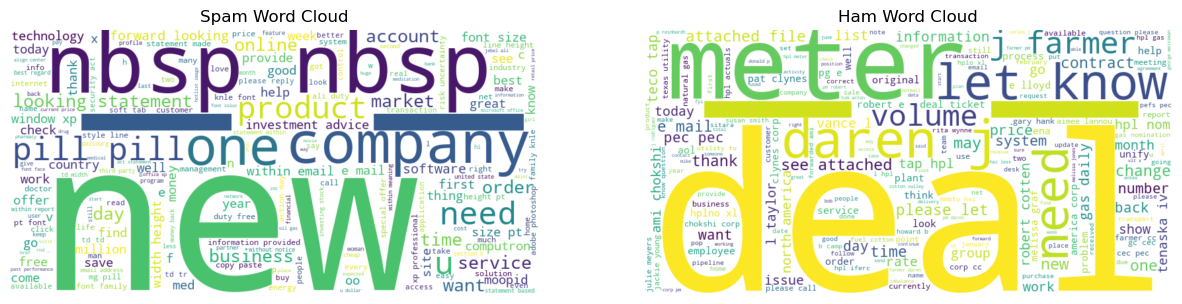

In [62]:
# Word cloud for spam messages
spam_text = " ".join(X_train[y_train == 'spam']['clean_text'].values)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Word cloud for ham messages
ham_text = " ".join(X_train[y_train == 'ham']['clean_text'].values)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Display the word clouds
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].imshow(spam_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Spam Word Cloud')
ax[1].imshow(ham_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Ham Word Cloud')
plt.show()

# Step 7 - Apply Data Preparation on Test Data


In [63]:
X_test_transformed = bow_vect.transform(X_test['text'])

print(X_test_transformed.shape)

(1035, 38745)


# Step 6, 8, 9 - Training and Testing Phase

## a. Naive Bayes

In [67]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics # đo độc chính xác dự đoán

# bulding the model
classifer = MultinomialNB()

classifer.fit(X_train_transformed, y_train) # huấn luyện đặc trưng
# dùng để huấn luyện mô hiinhf đã(fit)

# predicting on unseen data
# dự đoán trên tập test
y_test_pred = classifer.predict(X_test_transformed)

# model evaluation
print(metrics.accuracy_score(y_test, y_test_pred))

0.9748792270531401


## b. logistic Regression


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# bulding the model

classifer = LogisticRegression()

classifer.fit(X_train_transformed, y_train)

y_test_pred = classifer.predict(X_test_transformed)

print()
print(metrics.accuracy_score(y_test, y_test_pred))


0.9797101449275363
